Epoch 1/50
111/111 [==============================] - 3s 9ms/step - loss: 0.0025
Epoch 2/50
111/111 [==============================] - 1s 8ms/step - loss: 2.2942e-05
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 2.2841e-05
Epoch 4/50
111/111 [==============================] - 1s 6ms/step - loss: 2.2506e-05
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 2.3317e-05
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 2.2803e-05
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 2.3933e-05
Epoch 8/50
111/111 [==============================] - 1s 6ms/step - loss: 2.4476e-05
Epoch 9/50
111/111 [==============================] - 1s 6ms/step - loss: 2.2930e-05
Epoch 10/50
111/111 [==============================] - 1s 6ms/step - loss: 2.1831e-05
Epoch 11/50
111/111 [==============================] - 1s 6ms/step - loss: 2.2579e-05
Epoch 12/50
111/111 [==============================] - 1s 6ms/step 

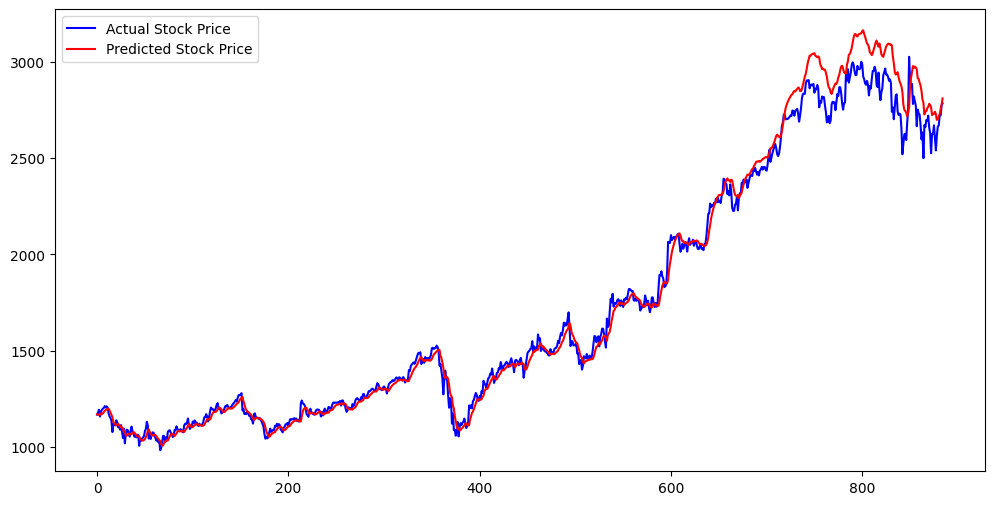

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess the data
data = pd.read_csv('GOOGL.csv')
data.head()
data = data['Open'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(data, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Stock Price', color='b')
plt.plot(predictions, label='Predicted Stock Price', color='r')
plt.legend()
plt.show()
